# Customer Segmentation Analysis with Python

In [ ]:
# Load and Explore Data

In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Mall_Customers.csv')

# Display the first few rows of the dataset
print(df.head())


   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [ ]:
#  Data Preprocessing

In [6]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

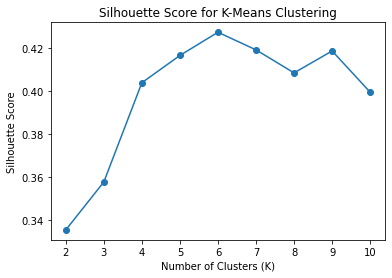

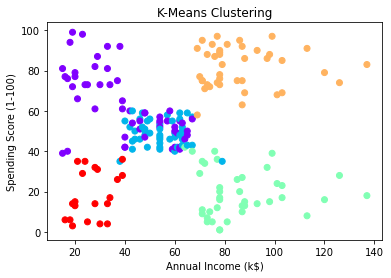

         Age  Annual Income (k$)  Spending Score (1-100)
0  25.185185           41.092593               62.240741
1  55.638298           54.382979               48.851064
2  39.871795           86.102564               19.358974
3  32.875000           86.100000               81.525000
4  46.250000           26.750000               18.350000


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



# Feature selection and preprocessing
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters (K) using the Elbow Method
# In this ,i  use the Silhouette Score
from sklearn.metrics import silhouette_score
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Plot the Silhouette Score for different values of K
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for K-Means Clustering')
plt.show()

# Choose an optimal K based on the analysis
chosen_K = 5  # Replace with your chosen number of clusters

# Apply K-Means with the chosen K
kmeans = KMeans(n_clusters=chosen_K)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters
plt.scatter(data['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering')
plt.show()

# Analyze and interpret the clusters
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_data = pd.DataFrame(cluster_centers, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
print(cluster_data)




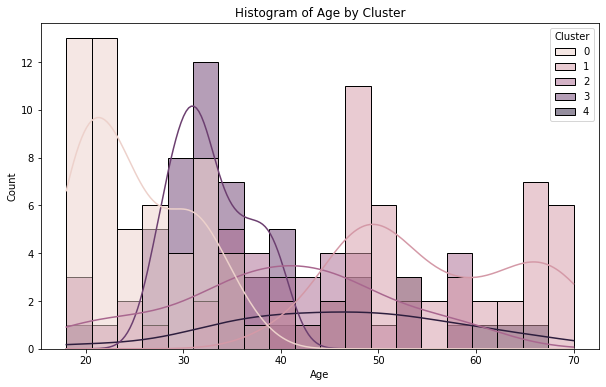

In [13]:
# Create histograms of 'Age' for each cluster
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', hue='Cluster', bins=20, kde=True)
plt.title('Histogram of Age by Cluster')
plt.show()


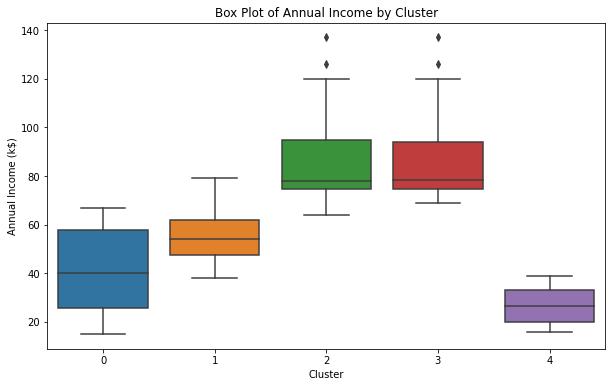

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot for 'Annual Income (k$)' across clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Annual Income (k$)', data=data)
plt.title('Box Plot of Annual Income by Cluster')
plt.show()


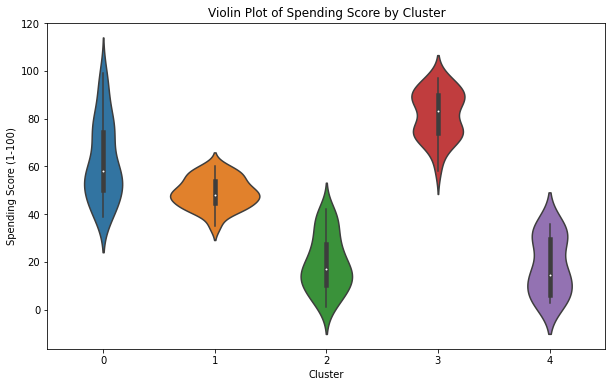

In [14]:
# Create violin plots of 'Spending Score (1-100)' by cluster
plt.figure(figsize=(10, 6))
sns.violinplot(x='Cluster', y='Spending Score (1-100)', data=data)
plt.title('Violin Plot of Spending Score by Cluster')
plt.show()
